In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import warnings; warnings.filterwarnings(action='once')
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('http://data.insideairbnb.com/united-states/ca/santa-clara-county/2019-11-07/data/calendar.csv.gz')


In [3]:
df.shape

(2795182, 7)

In [132]:
df['date'] = pd.to_datetime(df['date'])

In [133]:
df.set_index('date', inplace = True)

In [134]:
# Process the data
# x = month/year
# y1 = number of listings by month marked as 't' (available)
# y2 = number of listing by month marked as 'f' (unavailable)

x = df[df['available'] == 't'].groupby(pd.Grouper(freq='M')).count()[
    'available'].index.strftime('%b/%y')
y1 = df[df['available'] == 't'].groupby(
    pd.Grouper(freq='M')).count()['available']
y2 = df[df['available'] == 'f'].groupby(
    pd.Grouper(freq='M')).count()['available']



### Number of Available Listings per Month

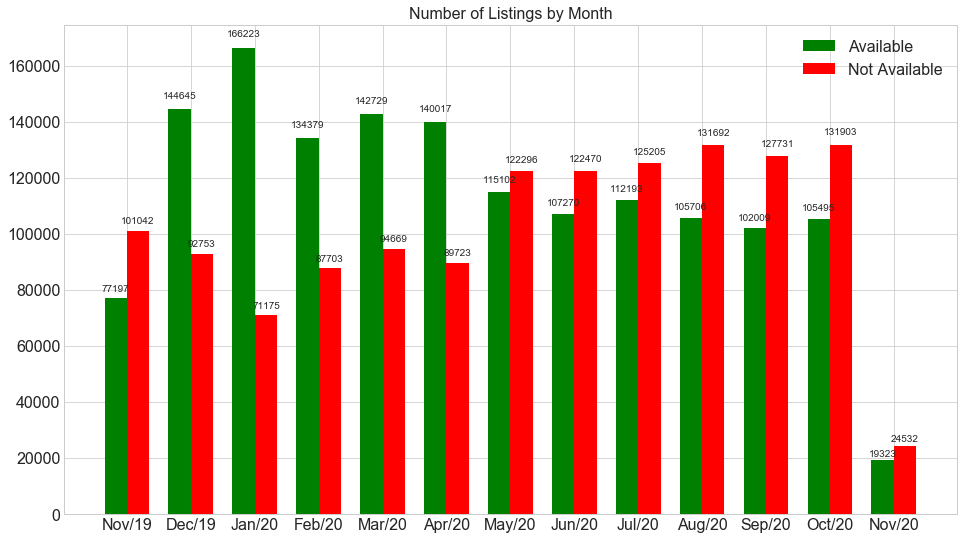

In [146]:
# Process the data
# x = month/year
# y1 = number of listings by month marked as 't' (available)
# y2 = number of listing by month marked as 'f' (unavailable)
x = df[df['available'] == 't'].groupby(pd.Grouper(freq='M')).count()[
    'available'].index.strftime('%b/%y')
y1 = df[df['available'] == 't'].groupby(
    pd.Grouper(freq='M')).count()['available']
y2 = df[df['available'] == 'f'].groupby(
    pd.Grouper(freq='M')).count()['available']

# Bar plots
ind = np.arange(len(x))*2  # the x locations for the groups
width = 0.7  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 9))
rects1 = ax.bar(ind, y1, width, color='g')
rects2 = ax.bar(ind + width, y2, width, color='r')

# add some text for labels, title and axes ticks
ax.set_title('Number of Listings by Month')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(x)

ax.legend((rects1[0], rects2[0]), ('Available', 'Not Available'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

plt.show()

### Number of Available  Listings as Percentage of Total Number of Listings by Month

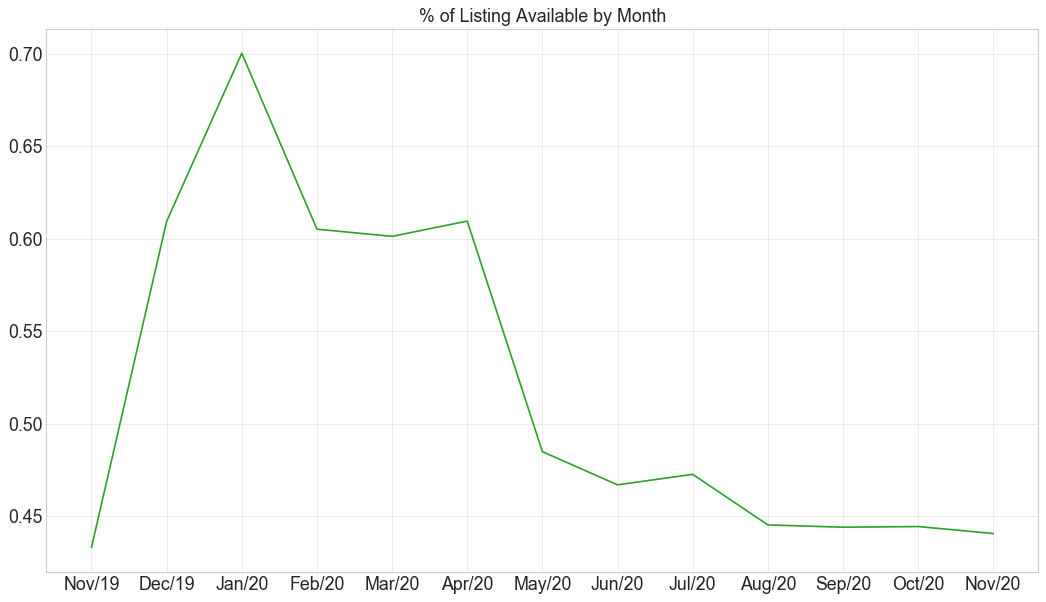

In [165]:
# Prepare Data

x = df[df['available'] == 't'].groupby(pd.Grouper(freq='M')).count()[
    'available'].index.strftime('%b/%y')

y = y1/(y1+y2)


# Plot
fig, ax = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax.plot(x, y, color='tab:green')


# Decorations
ax.set_title('% of Listing Available by Month')
ax.grid(alpha=.4)